In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("hypothyroid.csv")

In [3]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
df.replace('?', np.nan, inplace=True)

In [5]:
# Dropping TBG column as the entire column has no entries
df.drop('TBG', axis=1, inplace=True)

In [6]:
df.dropna(subset=['sex'], inplace=True)
df.dropna(subset=['age'], inplace=True)

In [7]:
df.drop("referral source", axis=1, inplace = True)

## Replacing T/F , M/F and P/N with 1 and 0 

In [8]:
columns_with_tf_values = df.columns[df.isin(['t', 'f']).all()]
print(columns_with_tf_values)

Index(['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
       'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
       'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured',
       'T4U measured', 'FTI measured', 'TBG measured'],
      dtype='object')


In [9]:
columns_to_replace = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                      'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
                      'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor',
                      'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured',
                      'T4U measured', 'FTI measured', 'TBG measured']

replace_dict = {'t': 1, 'f': 0}

df[columns_to_replace] = df[columns_to_replace].replace(replace_dict)

In [10]:
columns_to_replace = ['sex']

replace_dict = {'M': 0, 'F': 1}

df[columns_to_replace] = df[columns_to_replace].replace(replace_dict)

In [11]:
columns_to_replace = ['binaryClass']

replace_dict = {'P': 1, 'N': 0}

df[columns_to_replace] = df[columns_to_replace].replace(replace_dict)

In [12]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

## Finding and removing Outliers

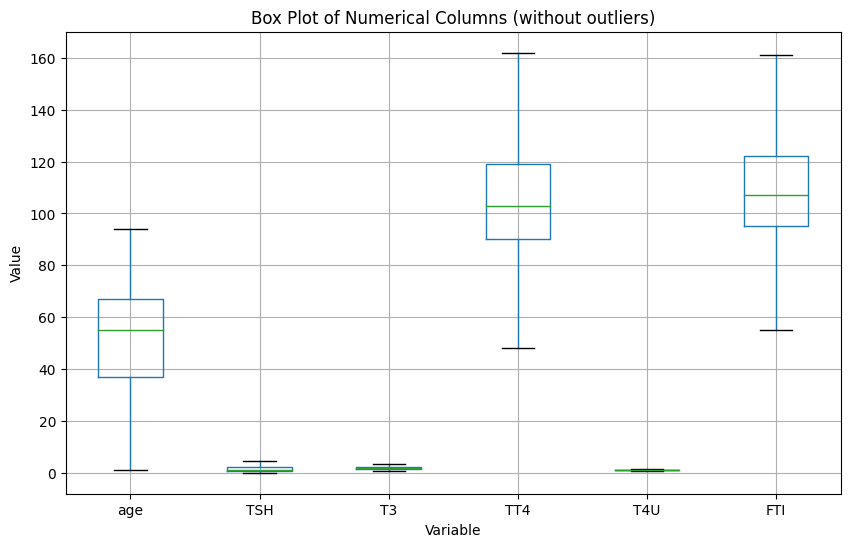

In [13]:
threshold = 1.5
numerical_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

outliers_removed = False

while not outliers_removed:
    outliers = pd.DataFrame(False, index=df.index, columns=numerical_cols)
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = (df[col] < (Q1 - threshold * IQR)) | (df[col] > (Q3 + threshold * IQR))
    
    if outliers.any().any():
        df = df[~outliers.any(axis=1)]
    else:
        outliers_removed = True

plt.figure(figsize=(10, 6))
df.boxplot(column=numerical_cols)
plt.title("Box Plot of Numerical Columns (without outliers)")
plt.xlabel("Variable")
plt.ylabel("Value")
plt.show()
df = df.reset_index(drop=True)

## Replacing missing attributes with median

In [14]:
missing_values = df.isnull().sum()
print(missing_values)

age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          327
T3 measured                    0
T3                           582
TT4 measured                   0
TT4                          212
T4U measured                   0
T4U                          319
FTI measured                   0
FTI                          318
TBG measured                   0
binaryClass                    0
dtype: int64


In [15]:
columns_to_fill = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

for column in columns_to_fill:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    median_value = np.median(df[column].dropna())
    df[column].fillna(median_value, inplace=True)

In [16]:
df.dtypes

age                            int64
sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [17]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [18]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,0.430108,1,0,0,0,0,0,0,0,0,...,1,0.703704,1,0.675439,1,0.736111,1,0.509434,0,1
1,0.236559,1,0,0,0,0,0,0,0,0,...,1,0.518519,1,0.473684,0,0.486111,0,0.490566,0,1
2,0.483871,0,0,0,0,0,0,0,0,0,...,0,0.518519,1,0.535088,1,0.416667,1,0.613208,0,1
3,0.741935,1,0,0,0,0,0,0,0,0,...,1,0.222222,1,0.114035,1,0.361111,1,0.141509,0,1
4,0.623656,1,0,0,0,0,0,0,0,0,...,0,0.518519,1,0.210526,1,0.430556,1,0.216981,0,1
